<center><image src="https://drive.google.com/uc?id=1n3G4TdK_u6PQHcLrxB_A0HijNdigXmUH">

<h3 style="text-align: center;"><b>Школа глубокого обучения ФПМИ МФТИ, 2024</b></h3>

<h1 style="text-align: center;"><b>Домашнее задание. Библиотека sklearn и классификация с помощью KNN</b></h1>

## Описание домашнего задания

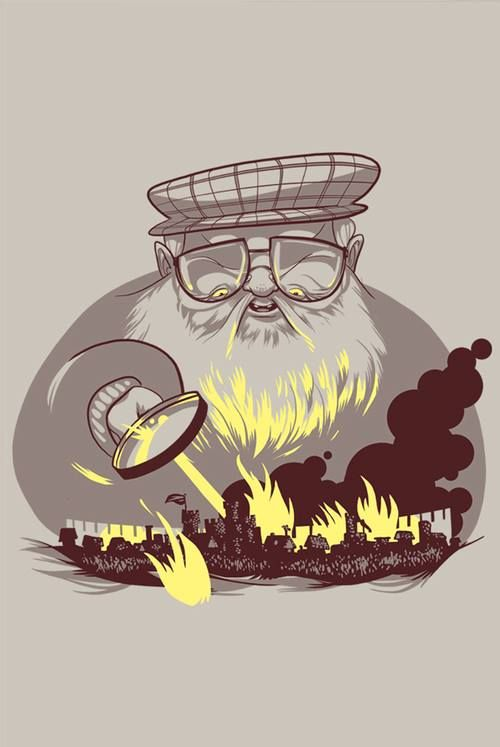

В данном задании вы будете работать с датасетом о персонажах из вселенной Игры Престолов [A Wiki of Ice and Fire](http://awoiaf.westeros.org/). Вам предстоит предсказать, кто из персонажей умрет, а кто останется вживых.



Описание данных:

* **name**: Имя персонажа

* **Title**: Социальный статус или знатность

* **House**: Дом, к которому принадлежит персонаж

* **Culture**: Социальная группа, к которой принадлежит персонаж

* **book1/2/3/4/5**: Появление персонажа в книге

* **Is noble**: Знатность персонажа, основанное на титуле

* **Age**: Отсчет времени: 305 AC

* **male**: Мужчина или женщина

* **dateOfBirth**: дата рождения

* **Spouse**: Имя супруги\а персонажа

* **Father**: Имя отца персонажа

* **Mother**: Имя матери персонажа

* **Heir**: Имя наследника персонажа

* **Is married**: Represents whether the character is married

* **Is spouse alive**: Represents whether character's spouse is alive

* **Is mother alive:** Жива ли мать персонажа

* **Is heir alive:** Жив ли наследник персонажа

* **Is father alive:** Указывает, жив ли отец персонажа

* **Number dead relations:** Количество умерших персонажей, с которыми персонаж связан

* **Popularity score:** Количество внутренних входящих и исходящих ссылок на страницу персонажей в вики http://awoiaf.westeros.org

Целевая переменная:
* **isAlive**: жив ли персонаж в книге

Оценивание:

Баллы считаются следующим образом:

1) $1.00 \geqslant score \geqslant 0.84$ --- 5 баллов

2) $0.84 > score \geqslant 0.77$ --- 4 балла

3) $0.77 > score \geqslant 0.70$ --- 3 балла

4) $0.70 > score \geqslant 0.65$ --- 2 балла

5) $0.65 > score \geqslant 0.6$ --- 1 балл

6) $0.60 > score$ --- 0 баллов

## Часть 1. Анализ и предобработка данных

Здесь вам необходимо сделать все шаги, которые обсуждались в первой части семинара.
* Предобработка данных
  * Обработка пропущенных данных
  * Создание новых признаков
  * Удаление ненужных столбцов
* Анализ данных
  * Анализ целевой переменной
  * Анализ признаков
  * Анализ влияния признаков на целевую переменную
* Подготовка данных для обучения модели

Загружаем датасет

In [1]:
!gdown 1h99toeF7lZ2I3iJwehgKO-QQmDaOe_O3 # test dataset
!gdown 1XL0VTygpZj-ZAuTNRBgApZTPQyNDnT-v # train dataset

Downloading...
From: https://drive.google.com/uc?id=1h99toeF7lZ2I3iJwehgKO-QQmDaOe_O3
To: /content/game_of_thrones_test.csv
100% 37.3k/37.3k [00:00<00:00, 47.4MB/s]
Downloading...
From: https://drive.google.com/uc?id=1XL0VTygpZj-ZAuTNRBgApZTPQyNDnT-v
To: /content/game_of_thrones_train.csv
100% 138k/138k [00:00<00:00, 72.1MB/s]


**Задание 1.1.** Импортируйте библиотеки pandas, matplotlib, seaborn

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

**Задание 1.2.** Загрузите датасет в Pandas DataFrame при помощи функции `read_csv`. Вместо дефолтных наименований строк `0,1,...`, при помощи параметра `index_col`, сделайте значения колонки `S.No` наименованиями строк:

In [70]:
data = pd.read_csv('/content/game_of_thrones_train.csv', index_col='S.No')

In [71]:
data

,name,title,male,culture,dateOfBirth,mother,father,heir,house,spouse,...,isAliveMother,isAliveFather,isAliveHeir,isAliveSpouse,isMarried,isNoble,age,numDeadRelations,popularity,isAlive
S.No,,,,,,,,,,,,,,,,,,,,,
1,Viserys II Targaryen,NaN,1,NaN,NaN,Rhaenyra Targaryen,Daemon Targaryen,Aegon IV Targaryen,NaN,NaN,...,1.0,0.0,0.0,NaN,0,0,NaN,11,0.605351,0
2,Walder Frey,Lord of the Crossing,1,Rivermen,208.0,NaN,NaN,NaN,House Frey,Perra Royce,...,NaN,NaN,NaN,1.0,1,1,97.0,1,0.896321,1
3,Addison Hill,Ser,1,NaN,NaN,NaN,NaN,NaN,House Swyft,NaN,...,NaN,NaN,NaN,NaN,0,1,NaN,0,0.267559,1
4,Aemma Arryn,Queen,0,NaN,82.0,NaN,NaN,NaN,House Arryn,Viserys I Targaryen,...,NaN,NaN,NaN,0.0,1,1,23.0,0,0.183946,0
5,Sylva Santagar,Greenstone,0,Dornish,276.0,NaN,NaN,NaN,House Santagar,Eldon Estermont,...,NaN,NaN,NaN,1.0,1,1,29.0,0,0.043478,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1553,Marwyn,Archmaester,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0,1,NaN,0,0.160535,1
1554,Masha Heddle,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0,0,NaN,0,0.040134,0
1555,Matthos Seaworth,NaN,1,NaN,NaN,NaN,NaN,NaN,House Seaworth,NaN,...,NaN,NaN,NaN,NaN,0,0,NaN,0,0.076923,0


**Задание 1.3.** Предобработка (очистка) данных.

Проанализируйте, если в колонках NaN значения. Если есть, примите решение, как вы их будете обрабатывать. Вы можете либо удалить их, либо заполнить каким нибудь значением (например, медианой или модой).

In [72]:
data.isna().sum()

,0
name,0
title,840
male,0
culture,1069
dateOfBirth,1278
mother,1539
father,1535
heir,1536
house,381
spouse,1357


In [73]:
for column in data.select_dtypes(include=['float64', 'int64']).columns:
    data[column].fillna(data[column].median(), inplace=True)

<ipython-input-73-0f2d1d445da2>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data[column].fillna(data[column].median(), inplace=True)


In [74]:
for column in data.select_dtypes(include=['object']).columns:
    data[column].fillna(data[column].mode()[0], inplace=True)

<ipython-input-74-1b25766f08e4>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data[column].fillna(data[column].mode()[0], inplace=True)


In [75]:
data.isna().sum()

,0
name,0
title,0
male,0
culture,0
dateOfBirth,0
mother,0
father,0
heir,0
house,0
spouse,0


**Задание 1.4.** Создайте новые признаки.
* Создайте признак isPopular. У вас есть в таблице признак popularity score, поставьте какой то порог, например, 0.5, и пусть те персонажи, у которых popularity score меньше 0.5, непопулярны, т.е. isPopular = 0. Если же выше 0.5, тогда пусть isPopular=1.
* Создайте признак boolDeadRelations. Давайте упростим признак numDeadRelations, и просто поделим людей на тех, у кого были хоть какие то отношения с мертвыми персонажами, т.е. numDeadRelations > 0, и те, у которых не было, т.е. numDeadRelations = 0.
* Упростите признак culture, объединив схожие названия в один.


In [76]:
data['isPopular'] = data['popularity'].apply(lambda x: 1 if x > 0.5 else 0)

In [77]:
data['boolDeadRelations'] = data['numDeadRelations'].apply(lambda x: 1 if x > 0 else 0)

In [78]:
# Подсказка
cult = {
    'Summer Islands': ['summer islands', 'summer islander', 'summer isles'],
    'Ghiscari': ['ghiscari', 'ghiscaricari',  'ghis'],
    'Asshai': ["asshai'i", 'asshai'],
    'Lysene': ['lysene', 'lyseni'],
    'Andal': ['andal', 'andals'],
    'Braavosi': ['braavosi', 'braavos'],
    'Dornish': ['dornishmen', 'dorne', 'dornish'],
    'Myrish': ['myr', 'myrish', 'myrmen'],
    'Westermen': ['westermen', 'westerman', 'westerlands'],
    'Westerosi': ['westeros', 'westerosi'],
    'Stormlander': ['stormlands', 'stormlander'],
    'Norvoshi': ['norvos', 'norvoshi'],
    'Northmen': ['the north', 'northmen'],
    'Free Folk': ['wildling', 'first men', 'free folk'],
    'Qartheen': ['qartheen', 'qarth'],
    'Reach': ['the reach', 'reach', 'reachmen'],
}

In [79]:
for key, values in cult.items():
    data['culture'].replace(values, key, regex=True, inplace=True)

In [80]:
data

,name,title,male,culture,dateOfBirth,mother,father,heir,house,spouse,...,isAliveHeir,isAliveSpouse,isMarried,isNoble,age,numDeadRelations,popularity,isAlive,isPopular,boolDeadRelations
S.No,,,,,,,,,,,,,,,,,,,,,
1,Viserys II Targaryen,Ser,1,Northmen,272.0,Rhaenyra Targaryen,Daemon Targaryen,Aegon IV Targaryen,House Frey,Walder Frey,...,0.0,1.0,0,0,24.0,11,0.605351,0,1,1
2,Walder Frey,Lord of the Crossing,1,Rivermen,208.0,Cersei Lannister,Aegon I Targaryen,Jaehaerys Targaryen,House Frey,Perra Royce,...,1.0,1.0,1,1,97.0,1,0.896321,1,1,1
3,Addison Hill,Ser,1,Northmen,272.0,Cersei Lannister,Aegon I Targaryen,Jaehaerys Targaryen,House Swyft,Walder Frey,...,1.0,1.0,0,1,24.0,0,0.267559,1,0,0
4,Aemma Arryn,Queen,0,Northmen,82.0,Cersei Lannister,Aegon I Targaryen,Jaehaerys Targaryen,House Arryn,Viserys I Targaryen,...,1.0,0.0,1,1,23.0,0,0.183946,0,0,0
5,Sylva Santagar,Greenstone,0,Dornish,276.0,Cersei Lannister,Aegon I Targaryen,Jaehaerys Targaryen,House Santagar,Eldon Estermont,...,1.0,1.0,1,1,29.0,0,0.043478,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1553,Marwyn,Archmaester,1,Northmen,272.0,Cersei Lannister,Aegon I Targaryen,Jaehaerys Targaryen,House Frey,Walder Frey,...,1.0,1.0,0,1,24.0,0,0.160535,1,0,0
1554,Masha Heddle,Ser,0,Northmen,272.0,Cersei Lannister,Aegon I Targaryen,Jaehaerys Targaryen,House Frey,Walder Frey,...,1.0,1.0,0,0,24.0,0,0.040134,0,0,0
1555,Matthos Seaworth,Ser,1,Northmen,272.0,Cersei Lannister,Aegon I Targaryen,Jaehaerys Targaryen,House Seaworth,Walder Frey,...,1.0,1.0,0,0,24.0,0,0.076923,0,0,0


**Задание 1.5.** Проанализируйте, какие столбцы являются существенными и влияют на предсказание, а какие нет. Удалите ненужные столбцы по вашему мнению.

Столбцы - [name, spouse, mother, father, heir] содержат уникальные и текстовые данные, не сильно влияющие на результат

In [81]:
data.drop(columns=['name', 'spouse', 'mother', 'father', 'heir'], inplace=True)

In [82]:
data

,title,male,culture,dateOfBirth,house,book1,book2,book3,book4,book5,...,isAliveHeir,isAliveSpouse,isMarried,isNoble,age,numDeadRelations,popularity,isAlive,isPopular,boolDeadRelations
S.No,,,,,,,,,,,,,,,,,,,,,
1,Ser,1,Northmen,272.0,House Frey,0,0,0,0,0,...,0.0,1.0,0,0,24.0,11,0.605351,0,1,1
2,Lord of the Crossing,1,Rivermen,208.0,House Frey,1,1,1,1,1,...,1.0,1.0,1,1,97.0,1,0.896321,1,1,1
3,Ser,1,Northmen,272.0,House Swyft,0,0,0,1,0,...,1.0,1.0,0,1,24.0,0,0.267559,1,0,0
4,Queen,0,Northmen,82.0,House Arryn,0,0,0,0,0,...,1.0,0.0,1,1,23.0,0,0.183946,0,0,0
5,Greenstone,0,Dornish,276.0,House Santagar,0,0,0,1,0,...,1.0,1.0,1,1,29.0,0,0.043478,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1553,Archmaester,1,Northmen,272.0,House Frey,1,0,1,1,0,...,1.0,1.0,0,1,24.0,0,0.160535,1,0,0
1554,Ser,0,Northmen,272.0,House Frey,1,1,0,0,0,...,1.0,1.0,0,0,24.0,0,0.040134,0,0,0
1555,Ser,1,Northmen,272.0,House Seaworth,0,1,1,1,1,...,1.0,1.0,0,0,24.0,0,0.076923,0,0,0


**Задание 1.6.** Проанализируйте целевую переменную. Посмотрите, является ли она категориальной или количественной. Так как мы говорим о задаче классификации, проанализируйте является ли датасет сбалансированным по классам или нет.

In [83]:
data['isAlive'].dtype

dtype('int64')

In [84]:
data['isAlive'].value_counts()

,count
isAlive,
1,1212
0,345


In [85]:
data['isAlive'].value_counts(normalize=True) * 100

,proportion
isAlive,
1,77.842004
0,22.157996


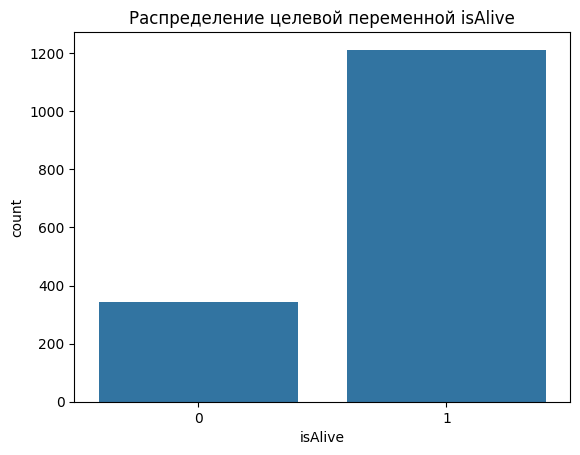

In [86]:
sns.countplot(data=data, x='isAlive')
plt.title('Распределение целевой переменной isAlive')
plt.show()

Явный дисбаланс классов

**Задание 1.7.** Проанализируйте признаки.
  * Обработайте категориальные признаки и переведите их в числа. Можете выбрать любой кодировщик.
  * Проанализируйте количественные признаки. Есть ли корреляция между признаками?

In [87]:
from sklearn.preprocessing import LabelEncoder

In [91]:
unprocessed_cat_features = data.select_dtypes(include=[object]).columns.tolist()

In [92]:
unprocessed_cat_features

['title', 'culture', 'house']

In [93]:
label_encoding = LabelEncoder()

# Fit and transform the categorical data
for column in unprocessed_cat_features:
  data[column] = label_encoding.fit_transform(data[column])

In [94]:
data

,title,male,culture,dateOfBirth,house,book1,book2,book3,book4,book5,...,isAliveHeir,isAliveSpouse,isMarried,isNoble,age,numDeadRelations,popularity,isAlive,isPopular,boolDeadRelations
S.No,,,,,,,,,,,,,,,,,,,,,
1,163,1,24,272.0,106,0,0,0,0,0,...,0.0,1.0,0,0,24.0,11,0.605351,0,1,1
2,115,1,31,208.0,106,1,1,1,1,1,...,1.0,1.0,1,1,97.0,1,0.896321,1,1,1
3,163,1,24,272.0,244,0,0,0,1,0,...,1.0,1.0,0,1,24.0,0,0.267559,1,0,0
4,145,0,24,82.0,21,0,0,0,0,0,...,1.0,0.0,1,1,23.0,0,0.183946,0,0,0
5,53,0,7,276.0,219,0,0,0,1,0,...,1.0,1.0,1,1,29.0,0,0.043478,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1553,1,1,24,272.0,106,1,0,1,1,0,...,1.0,1.0,0,1,24.0,0,0.160535,1,0,0
1554,163,0,24,272.0,106,1,1,0,0,0,...,1.0,1.0,0,0,24.0,0,0.040134,0,0,0
1555,163,1,24,272.0,222,0,1,1,1,1,...,1.0,1.0,0,0,24.0,0,0.076923,0,0,0


In [95]:
data.corr()['isAlive'].sort_values(ascending=False)

,isAlive
isAlive,1.000000
dateOfBirth,0.332522
book4,0.284014
isAliveHeir,0.125958
isAliveMother,0.091617
isAliveSpouse,0.063894
book5,0.032531
book3,0.018427
title,0.003981
isMarried,-0.049381


In [96]:
corr_matrix = data.corr()

In [97]:
corr_matrix

,title,male,culture,dateOfBirth,house,book1,book2,book3,book4,book5,...,isAliveHeir,isAliveSpouse,isMarried,isNoble,age,numDeadRelations,popularity,isAlive,isPopular,boolDeadRelations
title,1.000000,-0.001046,0.004874,0.045300,0.018346,-0.043968,0.081055,0.018158,-0.041655,-0.077889,...,-0.028283,0.019149,-0.045686,-0.445216,-0.028481,0.001666,-0.001359,0.003981,0.017128,-0.041904
male,-0.001046,1.000000,0.033346,-0.015668,0.043314,0.050526,0.024079,-0.008100,-0.101674,0.023022,...,-0.055919,0.135594,-0.094385,0.133807,0.049588,0.027506,0.113342,-0.148290,0.080518,0.039540
culture,0.004874,0.033346,1.000000,-0.222209,0.196250,0.104229,0.118004,0.043120,-0.129725,-0.065638,...,-0.035574,-0.110433,0.140240,0.171689,0.130843,0.099146,0.137667,-0.132554,0.066264,0.091558
dateOfBirth,0.045300,-0.015668,-0.222209,1.000000,-0.113230,0.023272,0.114058,0.123821,0.172367,0.063814,...,-0.010649,0.197596,-0.232998,-0.194558,-0.565281,-0.132237,-0.117975,0.332522,0.013754,-0.146830
house,0.018346,0.043314,0.196250,-0.113230,1.000000,0.118841,0.030398,0.085390,-0.044359,0.115613,...,0.038506,-0.025299,0.057292,0.040876,0.042755,0.019831,0.045208,-0.099601,-0.013268,0.013998
book1,-0.043968,0.050526,0.104229,0.023272,0.118841,1.000000,0.278116,0.145458,-0.009461,0.180542,...,0.026971,0.020949,0.018072,0.041593,0.017256,0.082526,0.186818,-0.112468,0.074789,0.139291
book2,0.081055,0.024079,0.118004,0.114058,0.030398,0.278116,1.000000,0.380968,0.102247,0.135720,...,0.046902,-0.052732,0.153332,-0.033216,-0.017150,-0.004477,0.150816,-0.055998,0.001636,0.055850
book3,0.018158,-0.008100,0.043120,0.123821,0.085390,0.145458,0.380968,1.000000,0.329153,0.226547,...,0.058559,-0.063013,0.165407,0.007279,-0.030002,-0.025633,0.140993,0.018427,-0.026356,0.032889
book4,-0.041655,-0.101674,-0.129725,0.172367,-0.044359,-0.009461,0.102247,0.329153,1.000000,0.302338,...,0.076219,-0.018940,0.141145,0.047394,-0.064155,-0.072370,0.038810,0.284014,-0.061401,-0.024038
book5,-0.077889,0.023022,-0.065638,0.063814,0.115613,0.180542,0.135720,0.226547,0.302338,1.000000,...,0.047176,0.024153,0.065210,0.069338,0.010069,0.032609,0.089715,0.032531,0.000907,0.094381


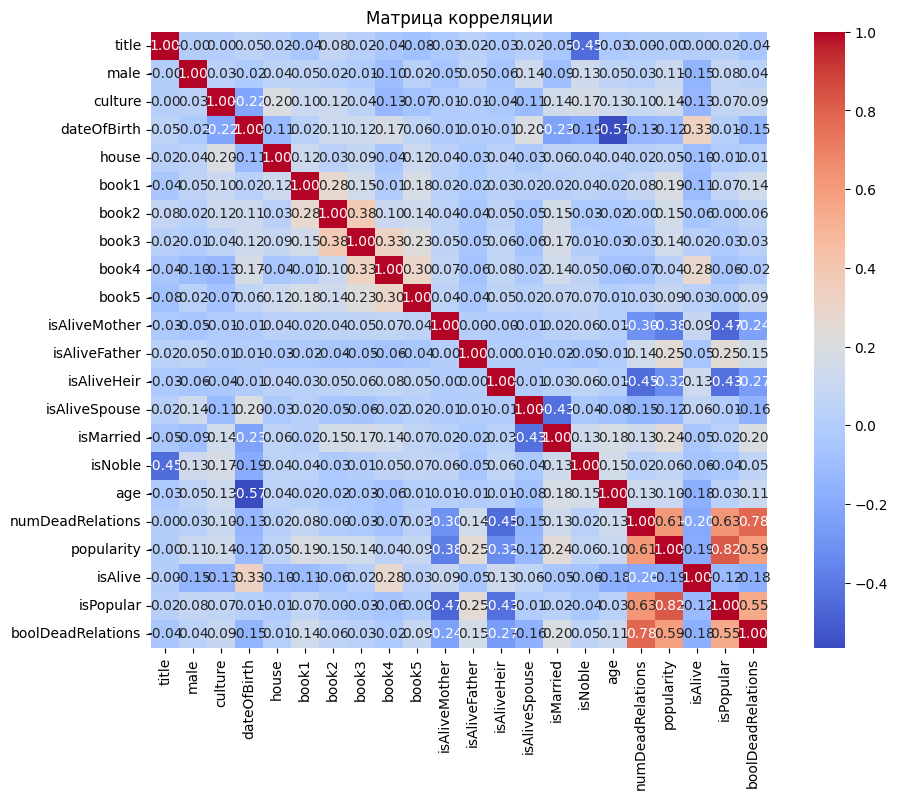

In [98]:
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', square=True)
plt.title('Матрица корреляции')
plt.show()

**Задание 1.8.** Проанализируйте влияние признаков на целевую переменную.

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When 

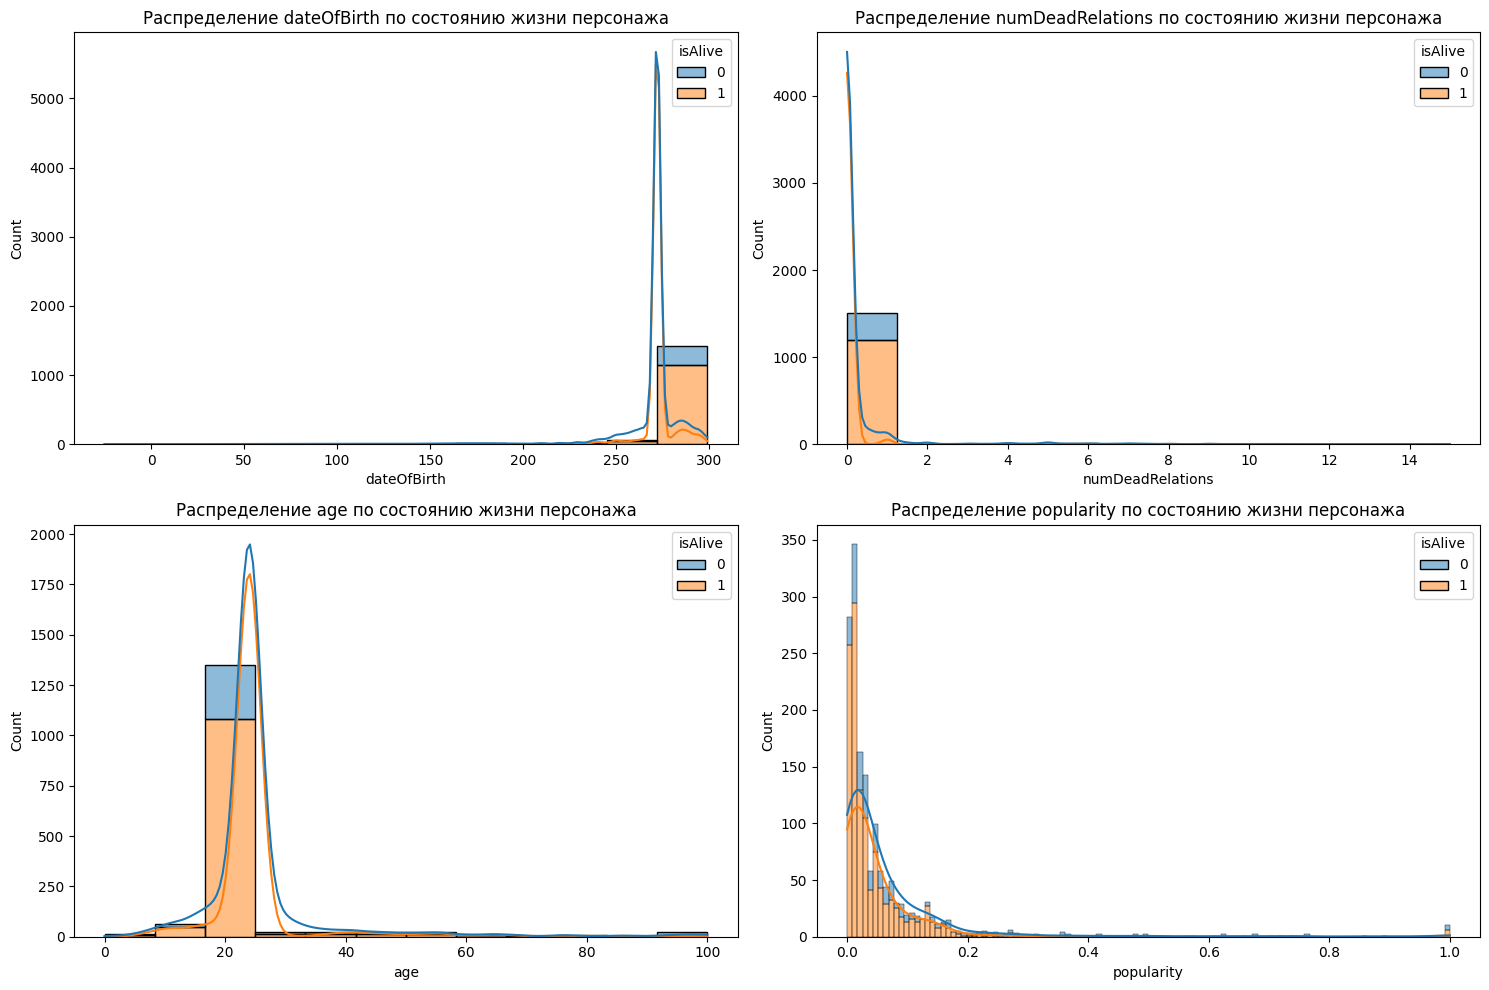

In [99]:
num_features = ['dateOfBirth', 'numDeadRelations', 'age', 'popularity']

plt.figure(figsize=(15, 10))
for i, feature in enumerate(num_features, 1):
    plt.subplot(2, 2, i)
    sns.histplot(data=data, x=feature, hue='isAlive', multiple='stack', kde=True)
    plt.title(f'Распределение {feature} по состоянию жизни персонажа')
plt.tight_layout()
plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


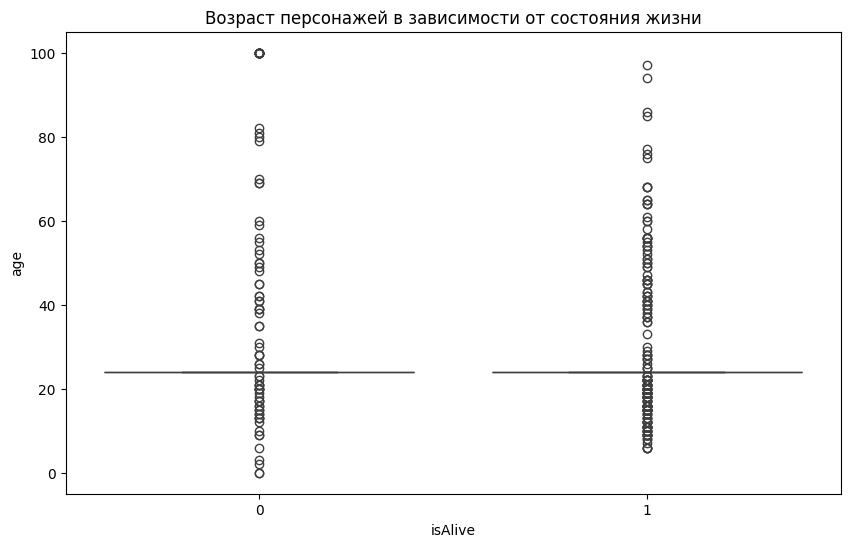

In [100]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='isAlive', y='age', data=data)
plt.title('Возраст персонажей в зависимости от состояния жизни')
plt.show()

**Задание 1.9.** Создайте переменные `X`, которая будет хранить только значения признаков, и `y`, которая будет хранить только значения целевой переменной.

In [101]:
X = data.drop(columns=['isAlive'])
y = data['isAlive']

In [102]:
X

,title,male,culture,dateOfBirth,house,book1,book2,book3,book4,book5,...,isAliveFather,isAliveHeir,isAliveSpouse,isMarried,isNoble,age,numDeadRelations,popularity,isPopular,boolDeadRelations
S.No,,,,,,,,,,,,,,,,,,,,,
1,163,1,24,272.0,106,0,0,0,0,0,...,0.0,0.0,1.0,0,0,24.0,11,0.605351,1,1
2,115,1,31,208.0,106,1,1,1,1,1,...,0.0,1.0,1.0,1,1,97.0,1,0.896321,1,1
3,163,1,24,272.0,244,0,0,0,1,0,...,0.0,1.0,1.0,0,1,24.0,0,0.267559,0,0
4,145,0,24,82.0,21,0,0,0,0,0,...,0.0,1.0,0.0,1,1,23.0,0,0.183946,0,0
5,53,0,7,276.0,219,0,0,0,1,0,...,0.0,1.0,1.0,1,1,29.0,0,0.043478,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1553,1,1,24,272.0,106,1,0,1,1,0,...,0.0,1.0,1.0,0,1,24.0,0,0.160535,0,0
1554,163,0,24,272.0,106,1,1,0,0,0,...,0.0,1.0,1.0,0,0,24.0,0,0.040134,0,0
1555,163,1,24,272.0,222,0,1,1,1,1,...,0.0,1.0,1.0,0,0,24.0,0,0.076923,0,0


In [103]:
y

,isAlive
S.No,
1,0
2,1
3,1
4,0
5,1
...,...
1553,1
1554,0
1555,0


**Задание 1.10.** Разделите датасет на train и test часть при помощи функции `train_test_split`

In [104]:
from sklearn.model_selection import train_test_split

In [105]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

## Часть 2. Обучение моделей

В данной части домашнего задания, мы хотим научиться обучать модели для задачи классификации на наших данных.

**Задание 2.1.** Импортируйте следующие модели из библиотеки `sklearn`
* LogisticRegression
* RandomForestClassifier
* AdaBoostClassifier
* GaussianProcessClassifier
* GaussianNB
* KNeighborsClassifier
* SVC
* DecisionTreeClassifier


В качестве примера, импортируем модель `LogisticRegression`

In [106]:
from sklearn.linear_model import LogisticRegression

Импортируйте остальные модели из библиотеки `sklearn`. Чтобы понять как это сделать, воспользуйтесь официальный документацией `sklearn` $→$ [тык](https://scikit-learn.org/dev/user_guide.html). По ключевому названию модели, вы сможете найти необходимую информацию о том, как можно импортировать модель из библиотеки.

In [107]:
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

**Задание 2.2.** Обучите модель и сделайте предсказание на тестовой выборке

В качестве примера, обучим модель `LogisticRegression` и сделаем на ней предсказания на тестовой выборке.

In [108]:
# Шаг 1. создание модели
logistic_regression = LogisticRegression(C=1)

# Шаг 2. обучение модели
logistic_regression.fit(X_train, y_train)

# Шаг 3. Предсказание на тестовых данных
y_pred = logistic_regression.predict(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Аналогичным образом обучите остальные модели и сделайте предсказания на тестовой выборке.

In [109]:
random_forest = RandomForestClassifier()
random_forest.fit(X_train, y_train)
y_pred_rf = random_forest.predict(X_test)

In [110]:
ada_boost = AdaBoostClassifier()
ada_boost.fit(X_train, y_train)
y_pred_ada = ada_boost.predict(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


In [111]:
gaussian_process = GaussianProcessClassifier()
gaussian_process.fit(X_train, y_train)
y_pred_gp = gaussian_process.predict(X_test)

In [112]:
gaussian_nb = GaussianNB()
gaussian_nb.fit(X_train, y_train)
y_pred_nb = gaussian_nb.predict(X_test)

In [113]:
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)

In [114]:
svc = SVC()
svc.fit(X_train, y_train)
y_pred_svc = svc.predict(X_test)

In [115]:
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, y_train)
y_pred_dt = decision_tree.predict(X_test)

## Часть 3. Оцените качество моделей

Вам необходимо познакомиться с метриками задачи классификации из sklearn. Оцените все модели и выберите лучшую по метрике качества Accuracy.

С метриками классификации вы можете ознакомиться в [Yandex ML Book](https://education.yandex.ru/handbook/ml/article/metriki-klassifikacii-i-regressii).

Для простоты в данном домашнем задании мы будем работать с самой базовой метрикой для задачи классификации - accuracy.

**Задание 3.1.** Вам необходимо посчитать метрику для всех моделей и выбрать лучшую модель.

Сначала импортируем необходимую функцию из библиотеки sklearn для подсчета accuracy.

In [116]:
from sklearn.metrics import accuracy_score

В качестве примера, посчитаем метрику accuracy для модели `LogisticRegression`

In [117]:
# Шаг 3. Предсказание на тестовых данных
y_pred = logistic_regression.predict(X_test)

# Шаг 4. Оценка предсказания по метрике accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy : %.4f" % accuracy)

Accuracy : 0.8045


Аналогичным образом посчитайте метрику accuracy для остальных моделей

In [118]:
# Словарь для хранения результатов
results = {}

In [119]:
accuracy_rf = accuracy_score(y_test, y_pred_rf)
results['Random Forest'] = accuracy_rf
print("Random Forest Accuracy: %.4f" % accuracy_rf)

Random Forest Accuracy: 0.8173


In [120]:
accuracy_ada = accuracy_score(y_test, y_pred_ada)
results['AdaBoost'] = accuracy_ada
print("AdaBoost Accuracy: %.4f" % accuracy_ada)

AdaBoost Accuracy: 0.8269


In [121]:
accuracy_gp = accuracy_score(y_test, y_pred_gp)
results['Gaussian Process'] = accuracy_gp
print("Gaussian Process Accuracy: %.4f" % accuracy_gp)

Gaussian Process Accuracy: 0.7788


In [122]:
accuracy_nb = accuracy_score(y_test, y_pred_nb)
results['GaussianNB'] = accuracy_nb
print("GaussianNB Accuracy: %.4f" % accuracy_nb)

GaussianNB Accuracy: 0.7756


In [123]:
accuracy_knn = accuracy_score(y_test, y_pred_knn)
results['KNeighborsClassifier'] = accuracy_knn
print("KNeighborsClassifier Accuracy: %.4f" % accuracy_knn)

KNeighborsClassifier Accuracy: 0.8013


In [124]:
accuracy_svc = accuracy_score(y_test, y_pred_svc)
results['SVC'] = accuracy_svc
print("SVC Accuracy: %.4f" % accuracy_svc)

SVC Accuracy: 0.8013


In [125]:
accuracy_dt = accuracy_score(y_test, y_pred_dt)
results['Decision Tree'] = accuracy_dt
print("Decision Tree Accuracy: %.4f" % accuracy_dt)

Decision Tree Accuracy: 0.7724


In [126]:
best_model = max(results, key=results.get)
best_accuracy = results[best_model]

In [127]:
best_model

'AdaBoost'

In [128]:
best_accuracy

0.8269230769230769

Лучшая модель: AdaBoost с accuracy: 0.8269

### Файл `submission.csv`

Вам нужно вместо значений в `submission.csv` файле в колонке `isAlive`, подставить свои предсказания и сохранить измененный файл.

In [129]:
test_data = pd.read_csv("/content/game_of_thrones_test.csv", index_col='S.No')

In [130]:
test_data

,name,title,male,culture,dateOfBirth,mother,father,heir,house,spouse,...,book5,isAliveMother,isAliveFather,isAliveHeir,isAliveSpouse,isMarried,isNoble,age,numDeadRelations,popularity
S.No,,,,,,,,,,,,,,,,,,,,,
1558,Melissa Blackwood,NaN,0,NaN,156.0,NaN,NaN,NaN,House Blackwood,NaN,...,1,NaN,NaN,NaN,NaN,0,0,100.0,0,0.050167
1559,Melisandre,NaN,0,Asshai,NaN,NaN,NaN,NaN,R'hllor,NaN,...,1,NaN,NaN,NaN,NaN,0,0,NaN,0,0.745819
1560,Merrit,NaN,0,NaN,NaN,NaN,NaN,NaN,Brotherhood without banners,NaN,...,0,NaN,NaN,NaN,NaN,0,0,NaN,0,0.010033
1561,Meryn Trant,Ser,1,NaN,NaN,NaN,NaN,NaN,House Trant,NaN,...,1,NaN,NaN,NaN,NaN,0,1,NaN,0,0.220736
1562,Merrett Frey,NaN,1,Riverlands,262.0,NaN,NaN,NaN,House Frey,Mariya Darry,...,1,NaN,NaN,NaN,1.0,1,0,38.0,0,0.434783
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1942,Luwin,NaN,1,Westeros,NaN,NaN,NaN,NaN,House Stark,NaN,...,1,NaN,NaN,NaN,NaN,0,0,NaN,0,0.351171
1943,Reek,NaN,1,NaN,NaN,NaN,NaN,NaN,House Bolton,NaN,...,1,NaN,NaN,NaN,NaN,0,0,NaN,0,0.096990
1944,Symeon Star-Eyes,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1,NaN,NaN,NaN,NaN,0,0,NaN,0,0.030100


In [131]:
test_data.isna().sum()

,0
name,0
title,168
male,0
culture,200
dateOfBirth,235
mother,386
father,385
heir,387
house,46
spouse,313


In [132]:
for column in test_data.select_dtypes(include=['float64', 'int64']).columns:
    test_data[column].fillna(test_data[column].median(), inplace=True)

<ipython-input-132-54b4c387de59>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  test_data[column].fillna(test_data[column].median(), inplace=True)


In [133]:
for column in test_data.select_dtypes(include=['object']).columns:
    test_data[column].fillna(test_data[column].mode()[0], inplace=True)

<ipython-input-133-f1d892f5e21a>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  test_data[column].fillna(test_data[column].mode()[0], inplace=True)


In [134]:
test_data

,name,title,male,culture,dateOfBirth,mother,father,heir,house,spouse,...,book5,isAliveMother,isAliveFather,isAliveHeir,isAliveSpouse,isMarried,isNoble,age,numDeadRelations,popularity
S.No,,,,,,,,,,,,,,,,,,,,,
1558,Melissa Blackwood,Ser,0,Northmen,156.0,Alyssa Velaryon,Aegon III Targaryen,Duncan Targaryen,House Blackwood,Tyrion Lannister,...,1,1.0,0.0,0.5,1.0,0,0,100.0,0,0.050167
1559,Melisandre,Ser,0,Asshai,267.0,Alyssa Velaryon,Aegon III Targaryen,Duncan Targaryen,R'hllor,Tyrion Lannister,...,1,1.0,0.0,0.5,1.0,0,0,32.0,0,0.745819
1560,Merrit,Ser,0,Northmen,267.0,Alyssa Velaryon,Aegon III Targaryen,Duncan Targaryen,Brotherhood without banners,Tyrion Lannister,...,0,1.0,0.0,0.5,1.0,0,0,32.0,0,0.010033
1561,Meryn Trant,Ser,1,Northmen,267.0,Alyssa Velaryon,Aegon III Targaryen,Duncan Targaryen,House Trant,Tyrion Lannister,...,1,1.0,0.0,0.5,1.0,0,1,32.0,0,0.220736
1562,Merrett Frey,Ser,1,Riverlands,262.0,Alyssa Velaryon,Aegon III Targaryen,Duncan Targaryen,House Frey,Mariya Darry,...,1,1.0,0.0,0.5,1.0,1,0,38.0,0,0.434783
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1942,Luwin,Ser,1,Westeros,267.0,Alyssa Velaryon,Aegon III Targaryen,Duncan Targaryen,House Stark,Tyrion Lannister,...,1,1.0,0.0,0.5,1.0,0,0,32.0,0,0.351171
1943,Reek,Ser,1,Northmen,267.0,Alyssa Velaryon,Aegon III Targaryen,Duncan Targaryen,House Bolton,Tyrion Lannister,...,1,1.0,0.0,0.5,1.0,0,0,32.0,0,0.096990
1944,Symeon Star-Eyes,Ser,1,Northmen,267.0,Alyssa Velaryon,Aegon III Targaryen,Duncan Targaryen,House Targaryen,Tyrion Lannister,...,1,1.0,0.0,0.5,1.0,0,0,32.0,0,0.030100


In [135]:
test_data['isPopular'] = test_data['popularity'].apply(lambda x: 1 if x > 0.5 else 0)

In [136]:
test_data['boolDeadRelations'] = test_data['numDeadRelations'].apply(lambda x: 1 if x > 0 else 0)

In [137]:
for key, values in cult.items():
    test_data['culture'].replace(values, key, regex=True, inplace=True)

<ipython-input-137-2fd98ed2a66e>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  test_data['culture'].replace(values, key, regex=True, inplace=True)


In [138]:
test_data.drop(columns=['name', 'spouse', 'mother', 'father', 'heir'], inplace=True)

In [139]:
test_data

,title,male,culture,dateOfBirth,house,book1,book2,book3,book4,book5,...,isAliveFather,isAliveHeir,isAliveSpouse,isMarried,isNoble,age,numDeadRelations,popularity,isPopular,boolDeadRelations
S.No,,,,,,,,,,,,,,,,,,,,,
1558,Ser,0,Northmen,156.0,House Blackwood,0,0,0,0,1,...,0.0,0.5,1.0,0,0,100.0,0,0.050167,0,0
1559,Ser,0,Asshai,267.0,R'hllor,0,1,1,1,1,...,0.0,0.5,1.0,0,0,32.0,0,0.745819,1,0
1560,Ser,0,Northmen,267.0,Brotherhood without banners,0,0,1,1,0,...,0.0,0.5,1.0,0,0,32.0,0,0.010033,0,0
1561,Ser,1,Northmen,267.0,House Trant,1,1,1,1,1,...,0.0,0.5,1.0,0,1,32.0,0,0.220736,0,0
1562,Ser,1,Riverlands,262.0,House Frey,1,1,1,1,1,...,0.0,0.5,1.0,1,0,38.0,0,0.434783,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1942,Ser,1,Westeros,267.0,House Stark,1,1,1,1,1,...,0.0,0.5,1.0,0,0,32.0,0,0.351171,0,0
1943,Ser,1,Northmen,267.0,House Bolton,0,1,0,1,1,...,0.0,0.5,1.0,0,0,32.0,0,0.096990,0,0
1944,Ser,1,Northmen,267.0,House Targaryen,1,1,1,1,1,...,0.0,0.5,1.0,0,0,32.0,0,0.030100,0,0


In [140]:
unprocessed_cat_features = test_data.select_dtypes(include=[object]).columns.tolist()

In [141]:
unprocessed_cat_features

['title', 'culture', 'house']

In [142]:
label_encoding = LabelEncoder()

# Fit and transform the categorical data
for column in unprocessed_cat_features:
  test_data[column] = label_encoding.fit_transform(test_data[column])

In [143]:
test_data

,title,male,culture,dateOfBirth,house,book1,book2,book3,book4,book5,...,isAliveFather,isAliveHeir,isAliveSpouse,isMarried,isNoble,age,numDeadRelations,popularity,isPopular,boolDeadRelations
S.No,,,,,,,,,,,,,,,,,,,,,
1558,94,0,24,156.0,22,0,0,0,0,1,...,0.0,0.5,1.0,0,0,100.0,0,0.050167,0,0
1559,94,0,0,267.0,128,0,1,1,1,1,...,0.0,0.5,1.0,0,0,32.0,0,0.745819,1,0
1560,94,0,24,267.0,6,0,0,1,1,0,...,0.0,0.5,1.0,0,0,32.0,0,0.010033,0,0
1561,94,1,24,267.0,106,1,1,1,1,1,...,0.0,0.5,1.0,0,1,32.0,0,0.220736,0,0
1562,94,1,32,262.0,50,1,1,1,1,1,...,0.0,0.5,1.0,1,0,38.0,0,0.434783,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1942,94,1,45,267.0,95,1,1,1,1,1,...,0.0,0.5,1.0,0,0,32.0,0,0.351171,0,0
1943,94,1,24,267.0,23,0,1,0,1,1,...,0.0,0.5,1.0,0,0,32.0,0,0.096990,0,0
1944,94,1,24,267.0,102,1,1,1,1,1,...,0.0,0.5,1.0,0,0,32.0,0,0.030100,0,0


In [144]:
#y_pred_ada = ada_boost.predict(test_data)#accuracy - 0.742930591259640

Попробую подобрать гиперпараметры для RandomForestClassifier чтобы улучшить accuracy

In [152]:
from sklearn.model_selection import GridSearchCV

In [153]:
rf = RandomForestClassifier(random_state=42)

In [154]:
param_grid = {
    'n_estimators': [100, 200, 500],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2'],
    'bootstrap': [True, False]
}

In [155]:
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)

In [156]:
grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 648 candidates, totalling 1944 fits


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
648 fits failed out of a total of 1944.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
648 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1466, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/uti

GridSearchCV(cv=3, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'bootstrap': [True, False],
                         'max_depth': [None, 10, 20, 30],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 500]},
             verbose=2)

In [165]:
grid_search.best_params_

{'bootstrap': False,
 'max_depth': 20,
 'max_features': 'sqrt',
 'min_samples_leaf': 2,
 'min_samples_split': 10,
 'n_estimators': 200}

In [158]:
y_pred = grid_search.best_estimator_.predict(test_data)

In [145]:
!gdown 1M14conWjAW2QLoyCXbHEAy8bql2f99eF

Downloading...
From: https://drive.google.com/uc?id=1M14conWjAW2QLoyCXbHEAy8bql2f99eF
To: /content/submission.csv
100% 2.74k/2.74k [00:00<00:00, 7.97MB/s]


In [159]:
submission = pd.read_csv("/content/submission.csv", index_col='S.No')

In [160]:
submission

,isAlive
S.No,
1558,0
1559,0
1560,0
1561,0
1562,0
...,...
1942,0
1943,0
1944,0


In [161]:
submission['isAlive'] = y_pred

In [162]:
submission

,isAlive
S.No,
1558,0
1559,1
1560,1
1561,1
1562,1
...,...
1942,1
1943,1
1944,1


Как сохранить измененный Pandas DataFrame в csv файл:

In [163]:
submission.to_csv("/content/sub1.csv", index=False)